In [ ]:
# adata.write('/hpc/hers_basak/rnaseq_data/Basaklab/lpossanzini/kamath/extra/filtered_adata_cellbender.h5ad')

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
#import scrublet as scr
import matplotlib.pyplot as plt

In [2]:
#adata =  sc.read_h5ad('/hpc/hers_basak/rnaseq_data/Basaklab/lpossanzini/kamath/extra/adata_cellbender.h5ad')

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


### Number of cells resulting from the merging of the CellBender output files
adata.shape
(858928, 60656)

In [3]:
adata = sc.read_h5ad('/hpc/hers_basak/rnaseq_data/Basaklab/lpossanzini/kamath/extra/filtered_adata_cellbender.h5ad')

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
adata.shape

(450276, 5004)

In [5]:
adata.obs

,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_counts,...,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,percent_mito,high_mito,doublet_scores,predicted_doublet,leiden
TAAGCACAGCGATGAC-1,0,12708,9.450066,221317,12.307356,26.063520,33.906568,42.792465,56.156554,221317,...,5.886104,0.162211,9,2.302585,0.004067,0.738759,False,0.046124,False,10
ATGAGTCCACTAAACC-1,0,13071,9.478228,204278,12.227242,27.844898,35.775267,44.265658,57.016908,204278,...,5.894403,0.177209,23,3.178054,0.011259,0.273647,False,0.029976,False,10
TCATGCCAGGGCCAAT-1,0,12909,9.465757,197852,12.195280,24.832703,32.918040,41.284394,54.729798,197852,...,5.814131,0.168813,22,3.135494,0.011119,0.616117,False,0.075188,False,10
ATCCTATCAACTTGCA-1,0,12289,9.416541,195452,12.183075,25.677404,33.804719,42.613020,56.109428,195452,...,5.669881,0.147862,13,2.639057,0.006651,0.777173,False,0.026832,False,10
CATGGTAAGCTAAACA-1,0,12827,9.459386,191865,12.164552,24.001251,32.212233,40.967347,54.295468,191865,...,5.828946,0.176687,14,2.708050,0.007297,0.552472,False,0.062991,False,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGATGCAGTCATGACT-1,83,793,6.677083,1238,7.122060,30.856220,40.468498,52.100162,76.332795,1238,...,1.791759,0.403877,0,0.000000,0.000000,12.520194,False,0.014035,False,5
TAGGTACTCGCCTTTG-1,83,967,6.875232,1232,7.117206,21.996753,29.626623,37.743506,62.094156,1232,...,2.197225,0.649351,0,0.000000,0.000000,7.629870,False,0.561485,True,18
AGCGTCGAGCTCACTA-1,83,819,6.709304,1269,7.146772,27.974783,37.667455,51.221434,74.862096,1269,...,4.488636,6.934594,0,0.000000,0.000000,8.195429,False,0.031377,False,24
TTCCGGTAGACTTGTC-1,83,1015,6.923629,1370,7.223296,21.678832,29.708029,40.510949,62.408759,1370,...,1.098612,0.145985,0,0.000000,0.000000,3.065693,False,0.084337,False,18


In [ ]:
# Modify the index by keeping only the first two parts of the split
adata.obs.index = ['-'.join(x.split('-')[:2]) for x in adata.obs.index]
adata.obs.head()

In [ ]:
#storing the raw data in adata.raw
adata.raw = adata

In [ ]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


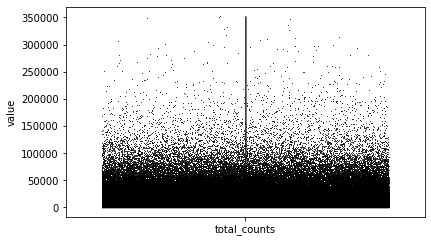

In [7]:
# Total counts per cell
sc.pl.violin(adata, 'total_counts', jitter=0.4)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


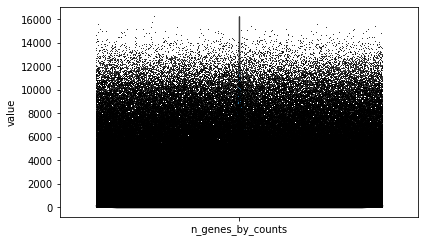

In [8]:
# Number of genes per cell
sc.pl.violin(adata, ['n_genes_by_counts'], jitter=0.4)

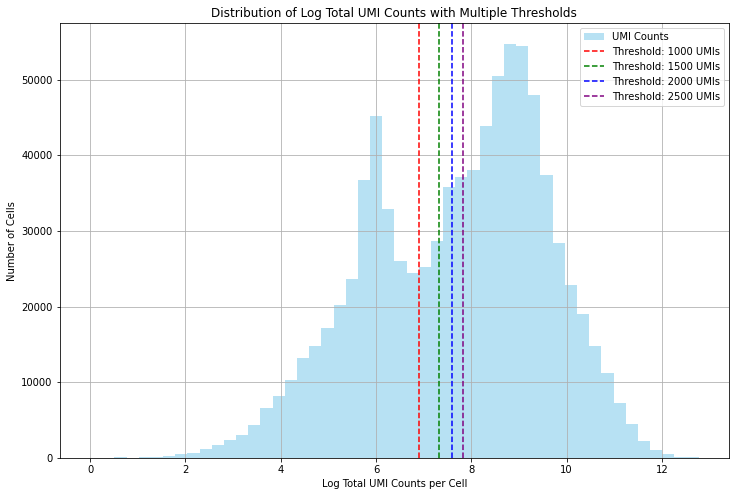

In [11]:

# Assuming 'adata' has been loaded and total UMI counts are already calculated
log_umi = np.log1p(adata.obs['total_counts'])  # Log-transform the UMI counts for visualization

# Prepare the figurea
plt.figure(figsize=(12, 8))
plt.hist(log_umi, bins=50, color='skyblue', alpha=0.6, label='UMI Counts')

# Define several thresholds to visualize
thresholds = [1000, 1500, 2000, 2500]  # List of UMI count thresholds
colors = ['red', 'green', 'blue', 'purple']  # Colors for the lines

# Plot each threshold
for threshold, color in zip(thresholds, colors):
    plt.axvline(x=np.log1p(threshold), color=color, linestyle='--', label=f'Threshold: {threshold} UMIs')

# Enhance the plot
plt.xlabel('Log Total UMI Counts per Cell')
plt.ylabel('Number of Cells')
plt.title('Distribution of Log Total UMI Counts with Multiple Thresholds')
plt.legend()
plt.grid(True)


plt.show()


In [6]:
# i have calculated the min UMI and then filtered by the min_genes so i have to filter the UMIs 
sc.pp.filter_cells(adata, min_counts=1200) 

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [13]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [15]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

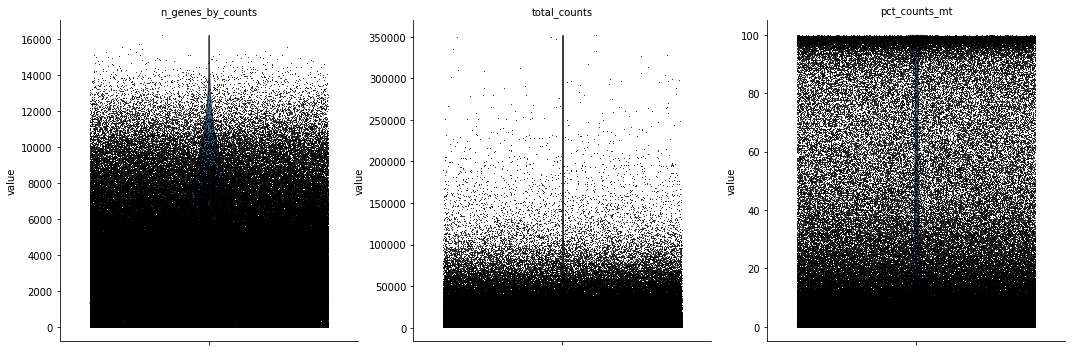

In [16]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

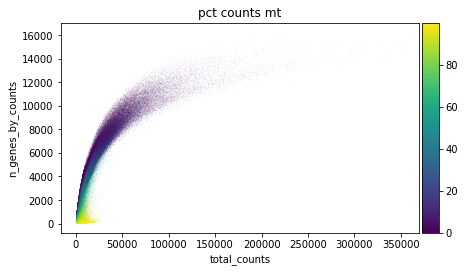

In [17]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [10]:
# Calculate the percentage of mitochondrial genes expressed per cell
adata.obs['percent_mito'] = np.sum(adata[:, adata.var['mt']].X, axis=1) / np.sum(adata.X, axis=1) * 100

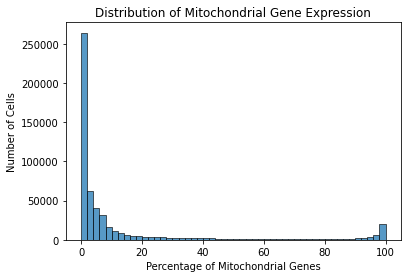

In [23]:
sns.histplot(adata.obs['percent_mito'], bins=50, kde=False)
plt.xlabel('Percentage of Mitochondrial Genes')
plt.ylabel('Number of Cells')
plt.title('Distribution of Mitochondrial Gene Expression')
plt.show()

In [24]:
# First, ensure there are no NaN values in the percent_mito column before computing percentiles
# It's common to have NaN values if any divisions by zero occurred during the calculation
if adata.obs['percent_mito'].isna().any():
    print("Warning: NaN values found in percent_mito. Replacing with 0 for percentile computation.")
    adata.obs['percent_mito'] = adata.obs['percent_mito'].fillna(0)

# Calculate the 95th percentile for mitochondrial content, ensuring no NaN values interfere
mito_cutoff = np.percentile(adata.obs['percent_mito'].dropna(), 95)
print(f"95th Percentile Cutoff for Mitochondrial Content: {mito_cutoff:.2f}%")

# Check the number of cells that would be filtered out
cells_above_cutoff = adata.obs['percent_mito'] > mito_cutoff
print(f"Number of cells above the cutoff: {cells_above_cutoff.sum()}")

95th Percentile Cutoff for Mitochondrial Content: 95.42%
Number of cells above the cutoff: 27325


In [25]:
# Add a new column to mark cells with high mitochondrial content
adata.obs['high_mito'] = adata.obs['percent_mito'] > mito_cutoff



In [11]:
# Define the thresholds in decimal format (e.g., 35% is 0.35)
thresholds = [35, 30, 25, 20, 15, 10]

# Total number of cells
total_cells = adata.obs.shape[0]

# Iterate through each threshold and calculate the number of cells above that threshold (filtered out) and below (remaining)
for threshold in thresholds:
    num_filtered_cells = (adata.obs['percent_mito'] > threshold).sum()  # Cells above the threshold
    num_remaining_cells = total_cells - num_filtered_cells  # Cells below or equal to the threshold
    print(f"Threshold {threshold}%: {num_filtered_cells} cells would be filtered out, {num_remaining_cells} cells would remain.")


Threshold 35%: 0 cells would be filtered out, 450276 cells would remain.
Threshold 30%: 0 cells would be filtered out, 450276 cells would remain.
Threshold 25%: 0 cells would be filtered out, 450276 cells would remain.
Threshold 20%: 0 cells would be filtered out, 450276 cells would remain.
Threshold 15%: 0 cells would be filtered out, 450276 cells would remain.
Threshold 10%: 0 cells would be filtered out, 450276 cells would remain.


In [ ]:
adata = adata[adata.obs['percent_mito'] <= 20].copy()
adata.obs.head()

### Mitochondrial content after filtering out cells with a percentage higher than 20%

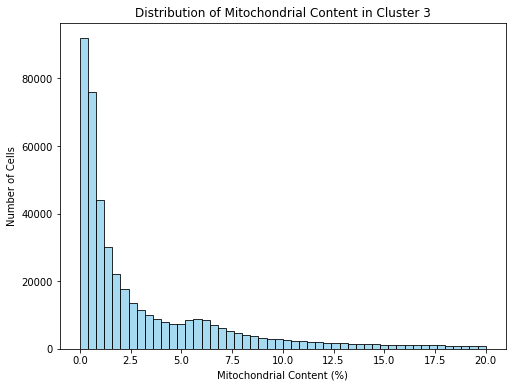

In [28]:
# Plot histogram of mitochondrial content
plt.figure(figsize=(8, 6))
sns.histplot(adata.obs['pct_counts_mt'], bins=50, kde=False, color='skyblue')
plt.xlabel('Mitochondrial Content (%)')
plt.ylabel('Number of Cells')
plt.title('Distribution of Mitochondrial Content in Cluster 3')
plt.show()

In [29]:
mitochondrial_genes = adata.var_names.str.startswith('MT-')  # or "mt-" for mouse data
adata = adata[:, ~mitochondrial_genes].copy()

# Check the shape of adata to confirm that mitochondrial genes have been removed
print(f"New shape of adata: {adata.shape}")

New shape of adata: (450276, 60619)


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [30]:
adata.var_names # manual check to see if the MT genes were removed 

Index(['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'MIR1302-2', 'FAM138A',
       'OR4G4P', 'OR4G11P', 'OR4F5', 'AL627309.1',
       ...
       'AMD1P2-1', 'DPH3P2-1', 'VAMP7-1', 'ELOCP24-1', 'TRPC6P-1', 'IL9R-1',
       'AJ271736.1-1', 'WASIR1-1', 'WASH6P-1', 'DDX11L16-1'],
      dtype='object', length=60619)

In [31]:
total_cells = adata.obs.shape[0]
print(f'adata now contains {total_cells} cells after removing low qaulity cells ')

adata now contains 450276 cells after removing low qaulity cells 


In [32]:
# Normalize total counts to make each cell comparable
sc.pp.normalize_total(adata, target_sum=1e4)

# Logarithmize the data to stabilize variance and compress the range
sc.pp.log1p(adata)

In [33]:
# Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)  # Adjust these parameters based on your dataset specifics

# Subset the data to highly variable genes
adata = adata[:, adata.var['highly_variable']]

# Scale the data
sc.pp.scale(adata, max_value=10)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [35]:
counts_matrix = adata.raw.X

# Initialize the Scrublet object
scrub = scr.Scrublet(counts_matrix)

# Run the doublet prediction (this step may take some time depending on the size of your dataset)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

# Add doublet scores and predicted doublet labels to the AnnData object
adata.obs['doublet_scores'] = doublet_scores
adata.obs['predicted_doublet'] = predicted_doublets

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.31
Detected doublet rate = 2.4%
Estimated detectable doublet fraction = 50.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 4.8%
Elapsed time: 3308.9 seconds


In [37]:
# Run PCA
sc.tl.pca(adata)

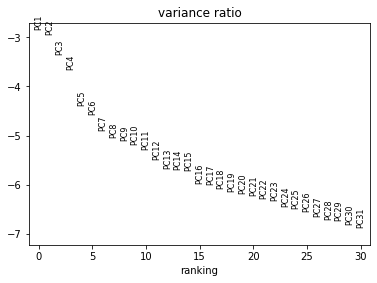

In [39]:
sc.pl.pca_variance_ratio(adata, log=True)

In [40]:
# Compute the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=12)  

In [41]:
# Run t-SNE
sc.tl.tsne(adata, n_pcs=10)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [42]:
# Run clustering
sc.tl.leiden(adata) 

In [43]:
# Optional: Run UMAP for visualization
sc.tl.umap(adata)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


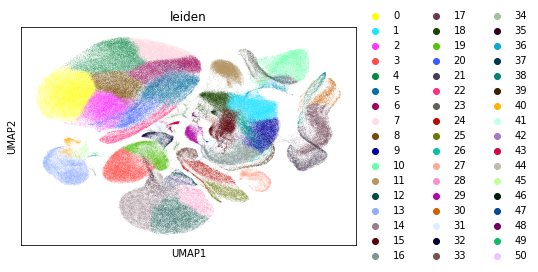

In [6]:
sc.pl.umap(adata, color ='leiden')

In [45]:
adata.obs['leiden']

TAAGCACAGCGATGAC-1    10
ATGAGTCCACTAAACC-1    10
TCATGCCAGGGCCAAT-1    10
ATCCTATCAACTTGCA-1    10
CATGGTAAGCTAAACA-1    10
                      ..
TGATGCAGTCATGACT-1     5
TAGGTACTCGCCTTTG-1    18
AGCGTCGAGCTCACTA-1    24
TTCCGGTAGACTTGTC-1    18
CGTTAGAAGCTGGAGT-1    20
Name: leiden, Length: 450276, dtype: category
Categories (51, object): ['0', '1', '2', '3', ..., '47', '48', '49', '50']

In [8]:
adata.obs['predicted_doublet'] = adata.obs['predicted_doublet'].astype('category')

# Verify the conversion
print(adata.obs['predicted_doublet'].dtype)

category


/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


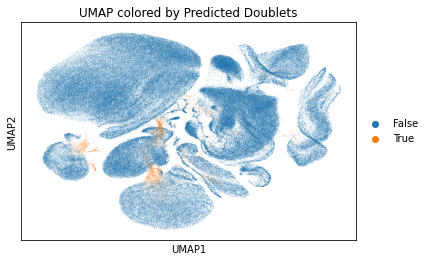

In [9]:
# Plot UMAP with colors based on 'predicted_doublet'
sc.pl.umap(adata, color='predicted_doublet', title='UMAP colored by Predicted Doublets')


In [20]:
total_cells = adata.obs.shape[0]

adata.obs['predicted_doublet'] = adata.obs['predicted_doublet'].astype(bool)
num_true_doublets = adata.obs['predicted_doublet'].sum() #True is treated as 1 and False as 0 in numerical contexts in Python
print(f"Number of predicted doublets (True): {num_true_doublets}")

remaining_cells = total_cells - num_true_doublets
print(f"Number of remaining cells after filtering out doubltes: {remaining_cells}")
      
adata.obs['predicted_doublet'] = adata.obs['predicted_doublet'].astype('category')


Number of predicted doublets (True): 10868
Number of remaining cells after filtering out doubltes: 439408
